In [1]:

import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from npeet import entropy_estimators
from tensorflow_wavelets.utils.models import DWT

2024-01-19 08:39:46.391274: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-19 08:39:47.588750: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# git clone https://github.com/gregversteeg/NPEET.git
# cd NPEET
# pip install .
# x = [[1.3],[3.7],[5.1],[2.4],[3.4]]
# y = [[1.5],[3.32],[5.3],[2.3],[3.3]]
# entropy_estimators.mi(x,y)
# Out: 0.168

In [3]:
def imshow_2_images(img1, img2, title, figsize=(8, 6)):
    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(title)
    axs[0].imshow(img1, cmap='gray')
    axs[0].axis("off")
    axs[0].grid(False)
    axs[1].imshow(img2, cmap='gray')
    axs[1].axis("off")
    axs[1].grid(False)

In [4]:
def mutual_info_wavelet_with_zeros(wavelet_name, img, pd_dict:dict, shape=(240, 240)):
    img = cv2.resize(img, shape)
    # expand dims for the dwt transfor
    img_t = np.expand_dims(img, axis=-1)
    img_ex = np.expand_dims(img_t, axis=0)
    # concat=1 LL,LH,HL,HH in one image
    coeffs = DWT.DWT(wavelet_name, concat=0)(tf.dtypes.cast(img_ex, tf.float32))
    # print("coeffs :", coeffs.shape)

    ll = tf.expand_dims(coeffs[:, :, :, 0], axis=-1)
    z_coefs = tf.zeros_like(ll)
    # print("LL :", ll.shape)
    coeefs_with_zeros = tf.concat([ll, z_coefs, z_coefs, z_coefs], axis=-1)

    # print("zero coeffs:", coeefs_with_zeros.shape)
    idwt = DWT.IDWT(wavelet_name, concat=0)(tf.dtypes.cast(coeefs_with_zeros, tf.float32))

    # print("idwt: ", idwt.shape)

    flat_img = img_ex.flatten()
    flat_recon_img = idwt[0, :, :, 0].numpy().flatten()

    mi = entropy_estimators.mi(flat_img, flat_recon_img)
    # print(f"Mutual Information = {mi}, for {wavelet_name} Wavelet")
    pd_dict[wavelet_name] = mi
    imshow_2_images(img ,idwt[0, :, :, 0], wavelet_name)


2024-01-19 08:39:51.267560: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/tmp/ipykernel_6992/3339370823.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

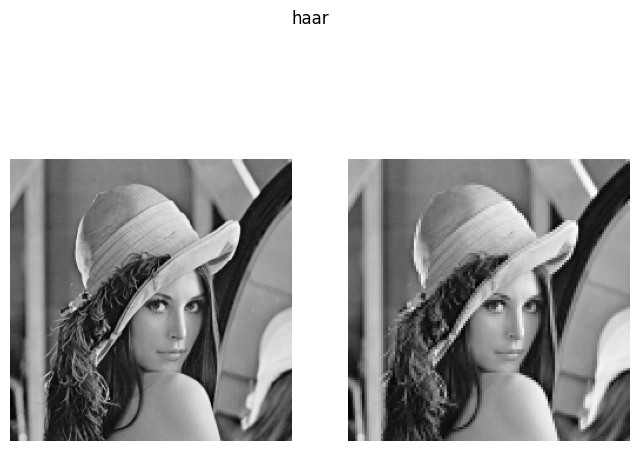

<Figure size 640x480 with 0 Axes>

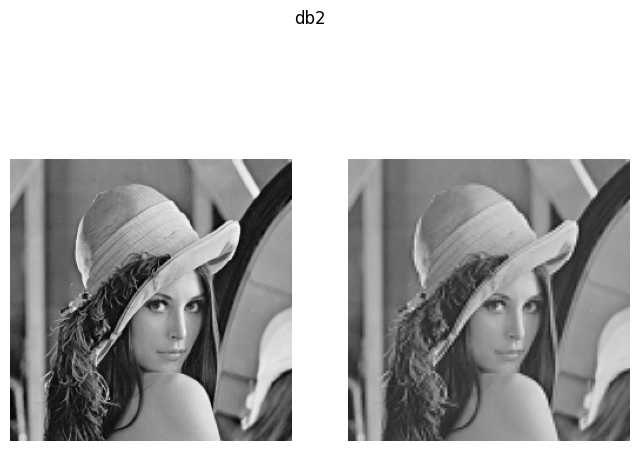

<Figure size 640x480 with 0 Axes>

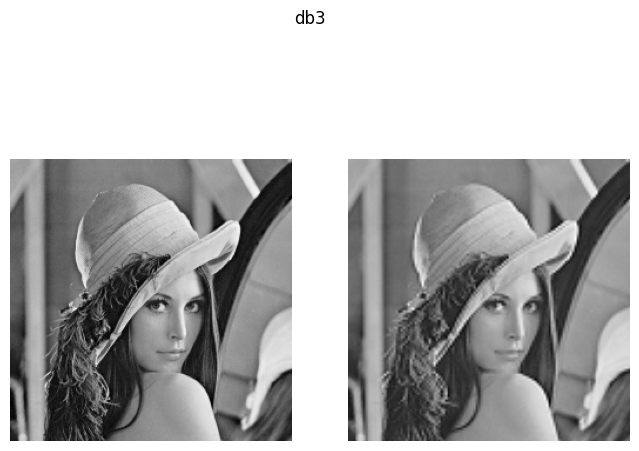

<Figure size 640x480 with 0 Axes>

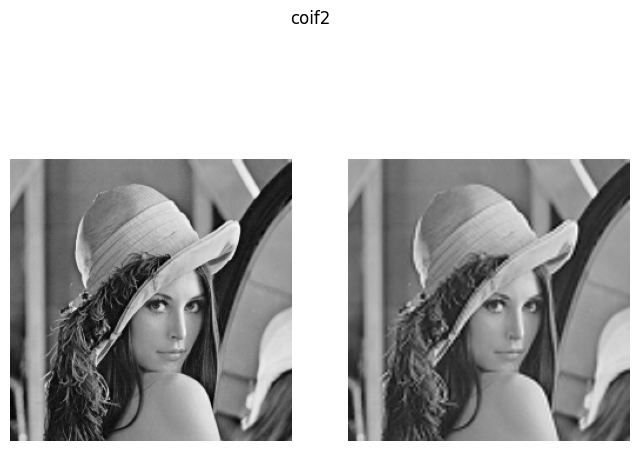

<Figure size 640x480 with 0 Axes>

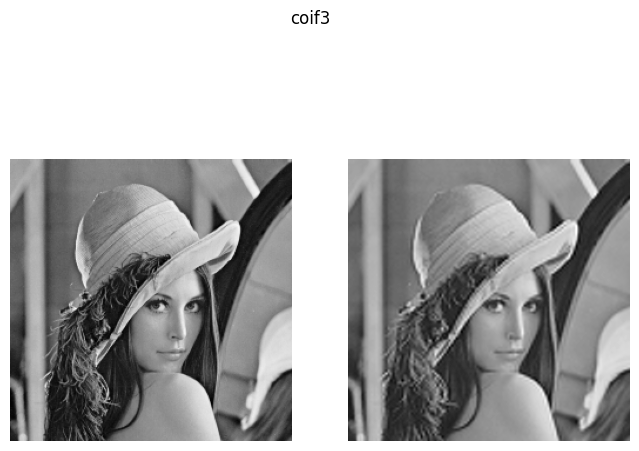

<Figure size 640x480 with 0 Axes>

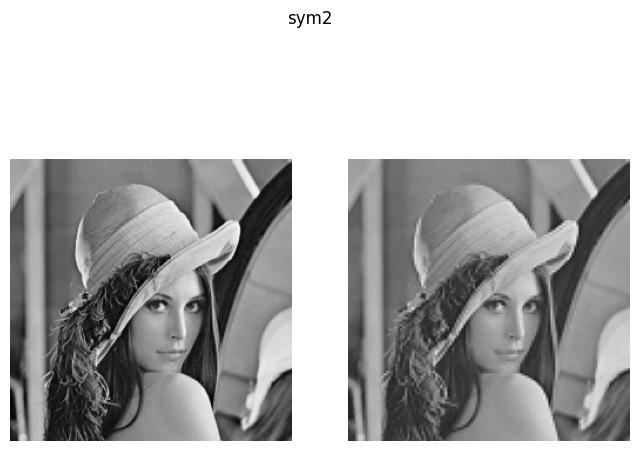

<Figure size 640x480 with 0 Axes>

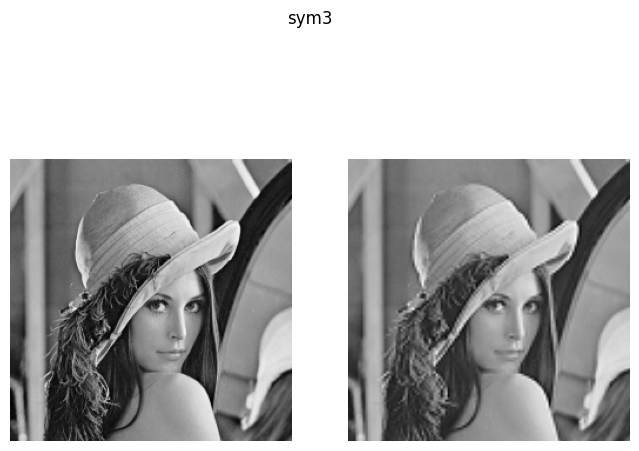

<Figure size 640x480 with 0 Axes>

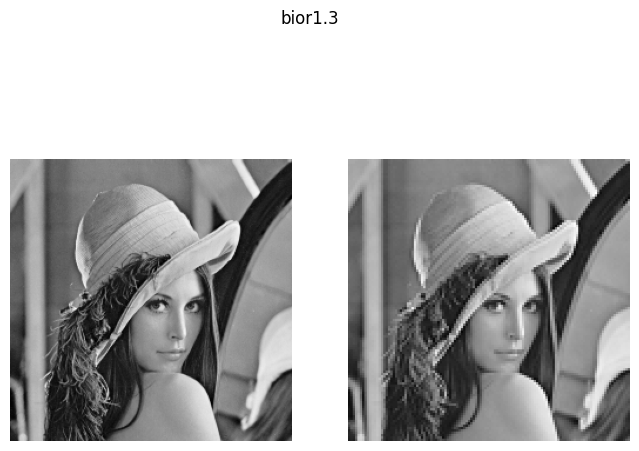

<Figure size 640x480 with 0 Axes>

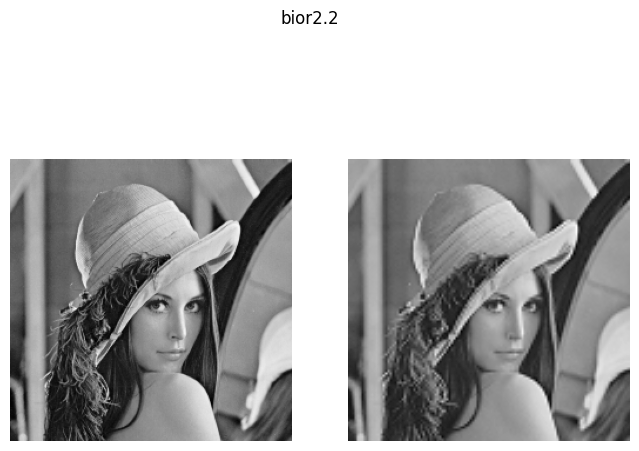

<Figure size 640x480 with 0 Axes>

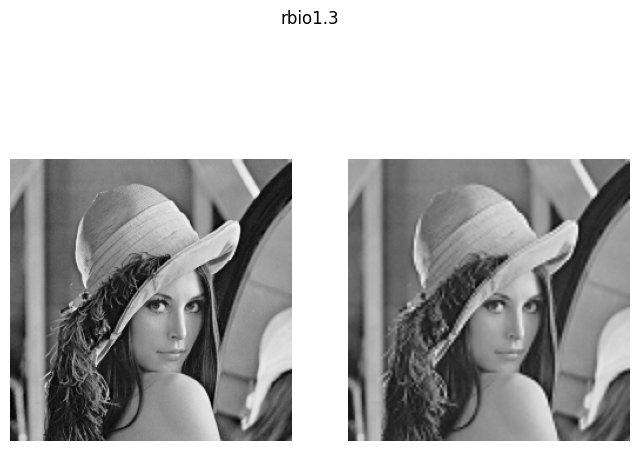

<Figure size 640x480 with 0 Axes>

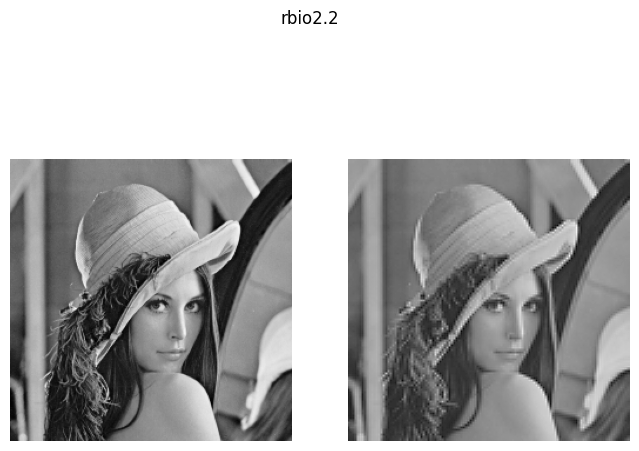

In [5]:
img = cv2.imread("../src/input/Lenna_orig.png", 0)
res_zeros = dict()
mutual_info_wavelet_with_zeros("haar", img, res_zeros)
mutual_info_wavelet_with_zeros("db2", img, res_zeros)
mutual_info_wavelet_with_zeros("db3", img, res_zeros)
mutual_info_wavelet_with_zeros("coif2", img, res_zeros)
mutual_info_wavelet_with_zeros("coif3", img, res_zeros)
mutual_info_wavelet_with_zeros("sym2", img, res_zeros)
mutual_info_wavelet_with_zeros("sym3", img, res_zeros)
mutual_info_wavelet_with_zeros("bior1.3", img, res_zeros)
mutual_info_wavelet_with_zeros("bior2.2", img, res_zeros)
mutual_info_wavelet_with_zeros("rbio1.3", img, res_zeros)
mutual_info_wavelet_with_zeros("rbio2.2", img, res_zeros)

In [6]:
df = pd.DataFrame(list(res_zeros.items()), columns=['wavelet_name', 'mutual_information'])
df

,wavelet_name,mutual_information
0,haar,2.894107
1,db2,3.159512
2,db3,3.216068
3,coif2,3.268547
4,coif3,3.281754
5,sym2,3.159495
6,sym3,3.215866
7,bior1.3,2.857300
8,bior2.2,3.270399
9,rbio1.3,3.245930
